In [2]:
from pathlib import Path
import pandas as pd   
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os

root_dir = os.path.abspath(os.path.join(os.path.dirname(__file__), "..")) if "__file__" in locals() else os.getcwd()
if os.path.basename(root_dir) != "src":
    while root_dir and not os.path.exists(os.path.join(root_dir, "src")):
        root_dir = os.path.dirname(root_dir)
sys.path.insert(0, root_dir)

from src.config import SPLIT_DIR
from src.utils_data import class_counts_from_dir
%matplotlib inline

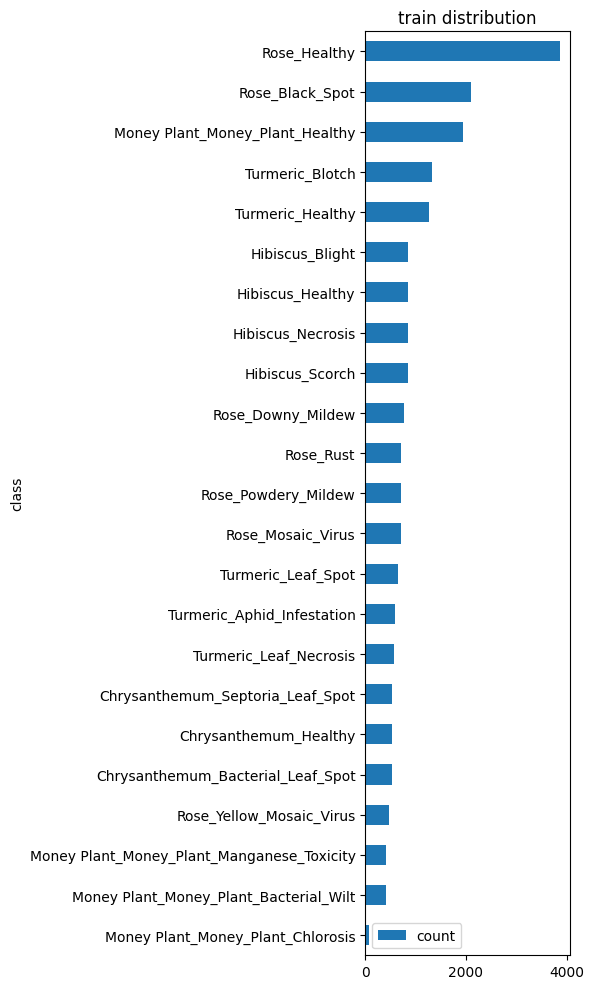

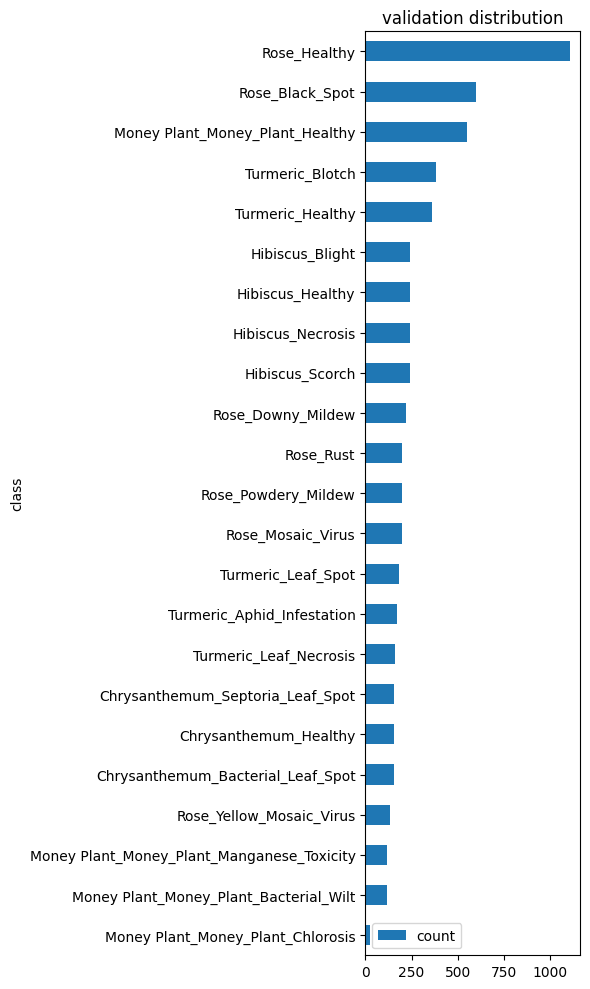

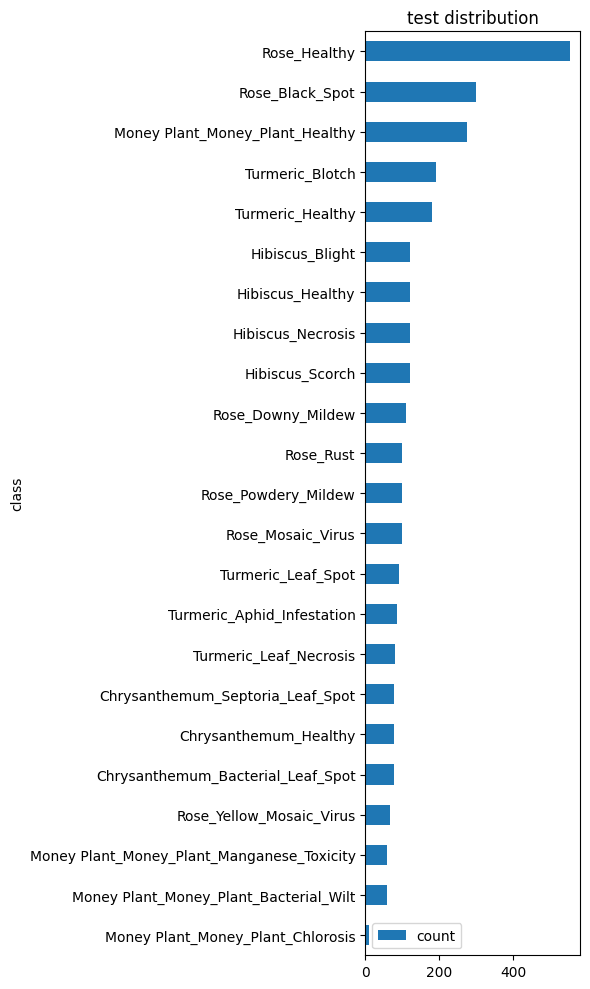

In [3]:
for split in ["train","validation","test"]:
    counts = class_counts_from_dir(SPLIT_DIR/split)
    df = pd.DataFrame({"class": list(counts.keys()), "count": list(counts.values())}).sort_values("count")
    ax = df.plot.barh(x="class", y="count", figsize=(6,10), title=f"{split} distribution")
    plt.tight_layout()
    plt.show()

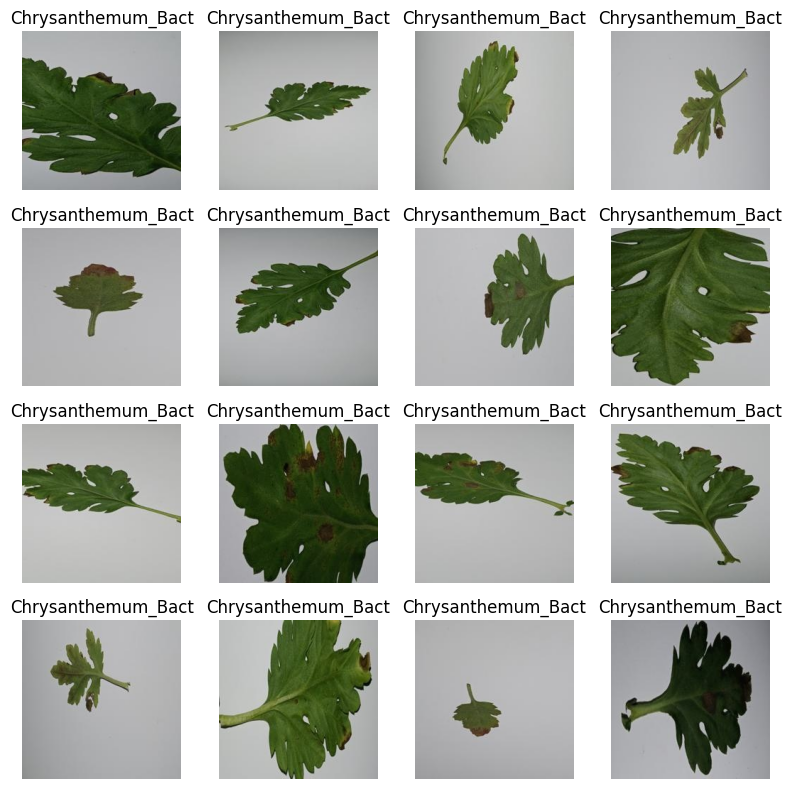

In [7]:
import matplotlib.pyplot as plt
import PIL, random
paths = list((SPLIT_DIR/"train").rglob("*.jpg"))[:500]
random.shuffle(paths)
plt.figure(figsize=(8,8))
for i,p in enumerate(paths[:16]):
    plt.subplot(4,4,i+1); plt.imshow(PIL.Image.open(p)); plt.axis("off"); plt.title(p.parent.name[:18])
plt.tight_layout(); plt.show()